In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf
import stockstats
from stockstats import StockDataFrame

In [2]:
data_path = 'data'
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [10]:
def DownloadStocksData(tic, period='2y', cache=True):
    file_path = f'{data_path}/{tic}.csv'
    if cache and os.path.exists(file_path):
        return pd.read_csv(file_path, index_col='Date')
    df = yf.download(tic, period=period, group_by='ticker')
    df.to_csv(file_path)
    return df

In [7]:
# gold = DownloadStocksData('GOLDBEES.NS')
# sbin = DownloadStocksData('SBIN.NS')

In [12]:
nifty50 = pd.read_csv('nifty50.csv')
stock_list = nifty50['Symbol'][1:]
for x in stock_list:
    DownloadStocksData(x+'.NS')

In [13]:
all_df = []
for x in stock_list:
    df = DownloadStocksData(x+'.NS')
    df = df[['Close']]
    df.columns = [x]
    all_df.append(df)
    
nifty50 = pd.concat(all_df, axis=1)

### Coerrelation

In [14]:
corr = nifty50.corr()

In [16]:
# corr['LT'].sort_values()

<AxesSubplot:xlabel='Date'>

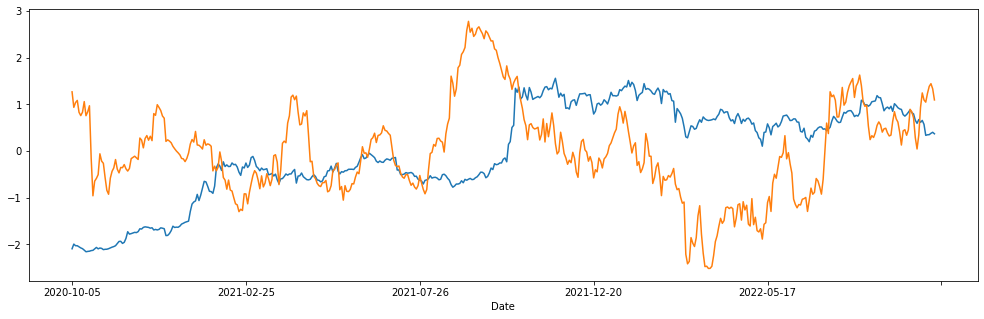

In [17]:
def Normalize(col):
    df = nifty50[col]
    df = (df-df.mean()) / df.std()
    return df

plt.figure(figsize=(17,5))
Normalize('TATAMOTORS').plot()
Normalize('BRITANNIA').plot()
# Normalize('SBIN').plot()

### Above 200 SMA

In [18]:
def getSMA(tic):
    df = DownloadStocksData(tic)
    sdf = stockstats.wrap(df)
    
    sma = sdf['close_200_sma'][-1]
    close = sdf['close'][-1]
    
    return {
        'tic': tic,
        'sma': sma,
        'close': close,
        'score': (close-sma) / sma
    }

In [19]:
sma_details = [getSMA(x+'.NS') for x in stock_list]

In [20]:
pd.DataFrame(sorted(sma_details, key=lambda x: abs(x['score'])))

,tic,sma,close,score
0,DRREDDY.NS,4289.576255,4341.250000,0.012046
1,KOTAKBANK.NS,1815.040749,1790.900024,-0.013300
2,AXISBANK.NS,723.011748,733.450012,0.014437
3,HDFCBANK.NS,1432.829253,1408.500000,-0.016980
4,POWERGRID.NS,217.526251,212.500000,-0.023106
5,HEROMOTOCO.NS,2607.339741,2545.699951,-0.023641
6,LT.NS,1776.112499,1823.099976,0.026455
7,NESTLEIND.NS,18289.866025,18869.000000,0.031664
8,JSWSTEEL.NS,645.398249,623.500000,-0.033930
9,HDFC.NS,2363.657498,2275.199951,-0.037424


### RSI

In [35]:
def getRSI(tic):
    df = DownloadStocksData(tic)
    sdf = stockstats.wrap(df)
    
    rsi = sdf['rsi_14'][-1]
    close = sdf['close'][-1]
    
    return {
        'tic': tic,
        'rsi': rsi,
        'close': close,
        'score': rsi
    }

In [36]:
rsi_details = [getRSI(x+'.NS') for x in stock_list]
pd.DataFrame(sorted(rsi_details, key=lambda x: abs(x['score'])))

,tic,rsi,close,score
0,BAJAJ-AUTO.NS,25.833691,3502.750000,25.833691
1,HEROMOTOCO.NS,28.319724,2545.699951,28.319724
2,TATAMOTORS.NS,32.375476,401.100006,32.375476
3,UPL.NS,34.233513,671.750000,34.233513
4,JSWSTEEL.NS,34.902038,623.500000,34.902038
5,TCS.NS,35.355466,2981.649902,35.355466
6,WIPRO.NS,35.941237,392.950012,35.941237
7,RELIANCE.NS,36.877641,2385.699951,36.877641
8,TECHM.NS,37.939089,1006.000000,37.939089
9,HDFCLIFE.NS,38.095106,525.750000,38.095106
